Andrew Marshall 
Assignment 2 
10/18/2018 
Assignment Objective: Build a decision tree model with Scikit-learn

In [1]:
# All the necessary modules and libraries are imported in this cell.

import numpy as np
import matplotlib.pyplot as plt
import mglearn.plots
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
cancer



{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [2]:
# The relevant dataset is imported and split into its training and test sets in this cell.

from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [3]:
#In this cell, the tree depth is set to 4 to minimize complexity and as a result, overfitting; 
# Consequently, there will be a slight reduction in accuracy.

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [4]:
#In this cell, the data is exported out to a dot file in preparation of visualizing the generated decision tree.

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

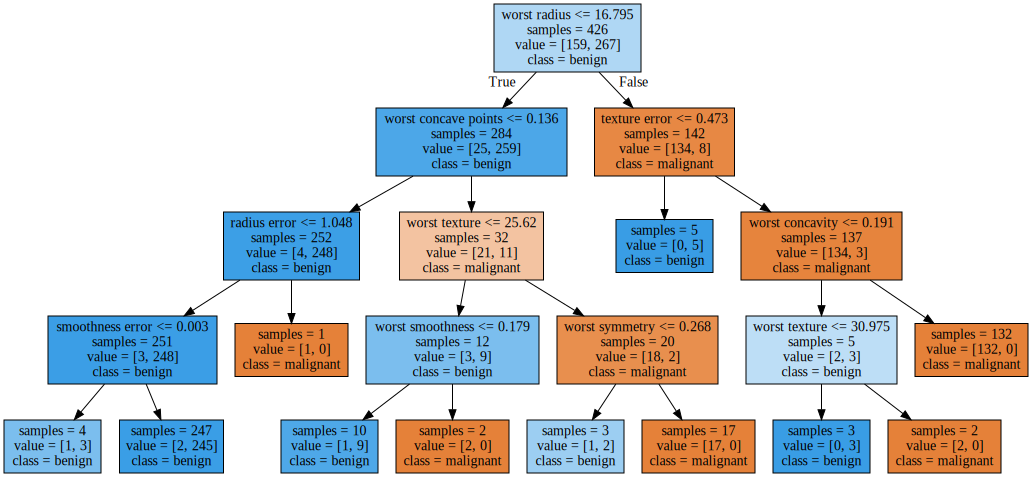

In [5]:
#In this cell, the previously imported dot file is processed using graphviz

import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [6]:
#In this cell, we generate an array of values get a summary of the feature importances, which rates features on a scale of 0 to 1;
#the closer a value is to 0, the less likely it was used in the decision tree; conversely, the closer a value is to 1 the more likely
#it was picked, which makes these better predictors for the decision tree.

print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


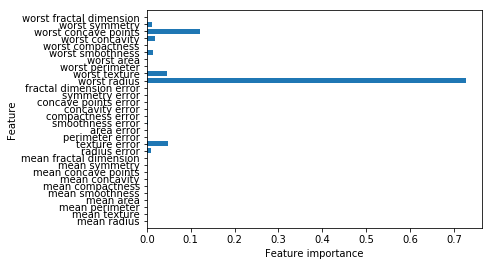

In [7]:
#In this cell, we plot a graph to represent the feature importances calculated in the previous cell.
#Note: that even though a feature importance may have a low value, does not mean it is useless.  In just indicates that another
#feature contains the same information, which is why the feature in question was not picked in the decision tree.

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Both models look to be relatively simple to use and interpret, though decision trees has an edge given that they can be better visualized. It also appears that both models can be adversely affected by overfitting, such as the heavy use of hyperparameter tuning for kNN and high-depth trees for DT.  kNN looks to be dependent on whatever data points are in close proxmity to the data point being evaluated, while DT looks to be dependent on the importance of certain features to help grow its decision trees; Both of these dependencies can potentially lead to errors if certain precautions are not taken, such as more sophisticated algoritms (i.e. deep learning) to help better predict nearest neighbors for kNN, or setting a maximum tree depth in DT to provide a more balanced decision tree.